In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import sys
print (sys.version_info)
path = os.path.dirname(os.__file__)
print(path)

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
/Users/jianhaisu/opt/anaconda3/lib/python3.7


In [4]:
def triPlot(reordedScores, reordedCancerColMean, reordedClearColMean, featnames, dataTag,
            titleTag=None, ytickSize=16, xtickSize=16, titleSize=16, legendFontSize=16):
    numFeat = len(featnames)
    x = range(1, 1+numFeat)
    plt.figure(figsize=(20,10))
    plt.plot(x, reordedScores, 'b-*', label="Importance")
    plt.plot(x, reordedCancerColMean, 'r-o', label="Cancer-FeatureMean")
    plt.plot(x, reordedClearColMean, 'g-s', label="Clear-FeatureMean")
    plt.legend(loc="best", fontsize=legendFontSize)
    plt.xticks(ticks=x, labels=featnames, rotation=90, fontsize=xtickSize)
    plt.yticks(fontsize=ytickSize)

    title = "{}: {} Features".format(dataTag, numFeat)
    if titleTag:
        title = title+"_"+titleTag
    plt.title(title, fontsize=titleSize)
    plt.grid()
    
    plt.tight_layout()
    filename = "impt_cancer_clear_{}_{}Features.png".format(dataTag, numFeat)
    plt.savefig(filename, dpi=600)

    
def selTriPlot(diffThreshold, imptScoreThreshold,
               reordedScores, reordedCancerColMean, reordedClearColMean, featnames,
               dataTag, ytickSize=16, xtickSize=16, titleSize=16, legendFontSize=16):
    diffIDs = np.where(diffFeatVals>diffThreshold)[0]+1
    diffIDs = diffIDs.tolist()
    scoreIDs = np.where(np.array(reordedScores)>imptScoreThreshold)[0]+1
    scoreIDs = scoreIDs.tolist()
    selection = list(set(diffIDs).intersection(set(scoreIDs)))
    list.sort(selection)
    
    numFeat = len(selection)
    selS = [reordedScores[i-1] for i in selection]
    selCancerM = [reordedCancerColMean[i-1] for i in selection]
    selClearM = [reordedClearColMean[i-1] for i in selection]
    selFN = [featnames[i-1] for i in selection]
    titleTag = "diffT{}_scoreT{}".format(diffThreshold, imptScoreThreshold)
    triPlot(selS, selCancerM, selClearM, selFN, dataTag, titleTag=titleTag,
            ytickSize=ytickSize, xtickSize=xtickSize, titleSize=titleSize, legendFontSize=legendFontSize)

    
def weightedDiffPlot(reordedScores, reordedCancerColMean, reordedClearColMean, featnames, dataTag, numFeat):
    x = range(1, 1+numFeat)
    diffFeatVals = np.abs(np.array(reordedCancerColMean) - np.array(reordedClearColMean))
    weightedDiffs = diffFeatVals*reordedScores
    plt.figure(figsize=(20,10))
    plt.plot(x, weightedDiffs, 'r-o', label="Weighted Abs Diff (Feature Mean)")
    plt.legend(loc="best", fontsize=16)
    plt.title("{}: {} Features".format(dataTag, numFeat), fontsize=16)
    plt.xticks(ticks=x, labels=featnames, rotation=90, fontsize=12)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.savefig("weighted_abs_feat_mean_diff_{}_{}Features.png".format(dataTag, numFeat), dpi=600)


In [19]:
featDirPre="extFeat_Diagnosis"
dataTags = ["Young", "Old", "All"]
numFeats = [70, 150, 150]
# 60, 108, 111
imptPost = "_importance.csv"
numFeat = 150

featNameSets = {}
for dataTag in dataTags:
    featDir = featDirPre+"_"+dataTag
    featImptFP = os.path.join(featDir, str(numFeat)+"feats"+imptPost)
    featsImpt = pd.read_csv(featImptFP)
    print("{}: {} features".format(dataTag, len(featsImpt.FeatureName)))
    featNameSets[dataTag] = set(featsImpt.FeatureName)

Young: 60 features
Old: 108 features
All: 111 features


In [20]:
InterSet3S = featNameSets["All"].intersection(featNameSets["Young"], featNameSets["Old"])
InterSetYO = featNameSets["Old"].intersection(featNameSets["Young"])
InterSetOA = featNameSets["Old"].intersection(featNameSets["All"])
InterSetYA = featNameSets["All"].intersection(featNameSets["Young"])
UnionYO = featNameSets["Old"].union(featNameSets["Young"])
InterSet_A_vs_UnionYO = featNameSets["All"].intersection(UnionYO)
len(InterSet_A_vs_UnionYO)

32

In [21]:
InterSetYO

{'cg04656009'}

In [22]:
InterSetYA

{'cg04656009', 'cg14337027'}

In [23]:
len(InterSetOA)

31

In [24]:
s='cg04656009'
int(s[2:])

4656009

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000.]), <a list of 8 Text xticklabel objects>)

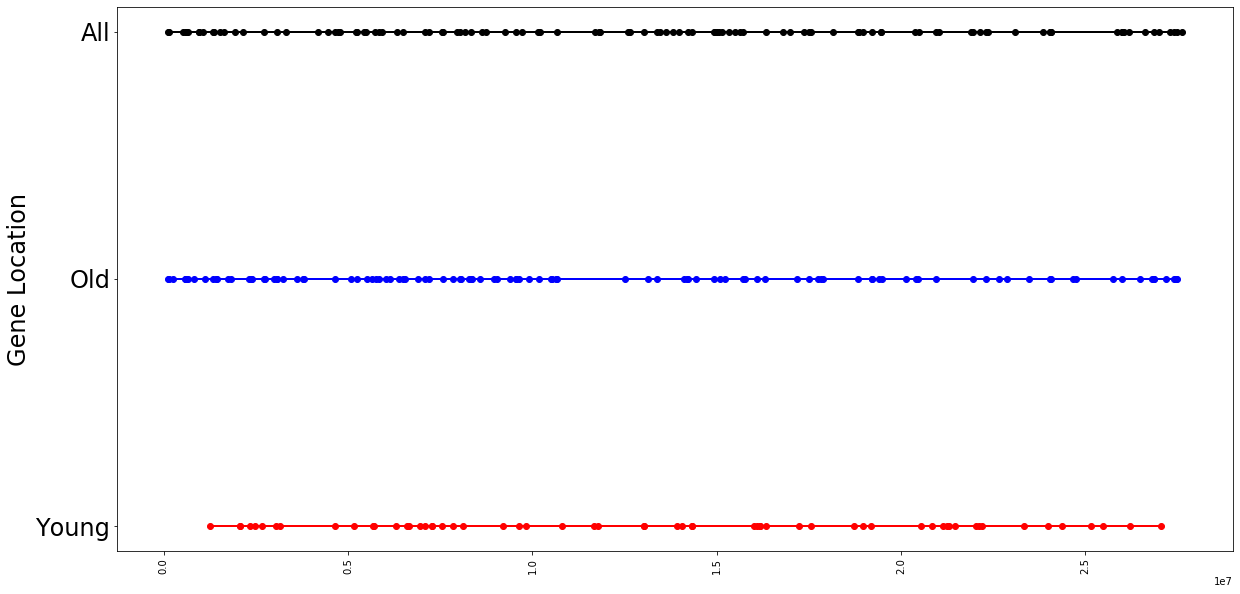

In [25]:
all_gene_locs = [int(s[2:]) for s in featNameSets["All"]]
old_gene_locs = [int(s[2:]) for s in featNameSets["Old"]]
young_gene_locs = [int(s[2:]) for s in featNameSets["Young"]]

plt.figure(figsize=(20,10))
plt.plot(all_gene_locs, [3]*len(all_gene_locs), 'ko-',label="All")
plt.plot(old_gene_locs, [2]*len(old_gene_locs), 'bo-',label="Old")
plt.plot( young_gene_locs, [1]*len(young_gene_locs),'ro-',label="Young")

#plt.legend(loc="best", fontsize=24)
plt.ylabel("Gene Location", fontsize=24)
plt.yticks([1, 2, 3], ['Young', 'Old', 'All'], fontsize=24)
plt.xticks(rotation=90)

In [30]:
featDirPre="extFeat_Diagnosis"
dataTags = ["Young", "Old", "All"]
numFeats = [70, 150, 150]
# 60, 108, 111
imptPost = "_importance.csv"
dataTag = "All"
numFeat = 150
featDir = featDirPre+"_"+dataTag
featFP     = os.path.join(featDir, str(numFeat)+"feats.csv")
featImptFP = os.path.join(featDir, str(numFeat)+"feats"+imptPost)

feats = pd.read_csv(featFP)
feats = feats.rename(columns={"class": "Diagnosis"})
CancerDF = feats.loc[(feats['Diagnosis'] == 1.0)].drop(columns=["Diagnosis"])
CancerDF = CancerDF.mean()
ClearDF = feats.loc[(feats['Diagnosis'] == -1)].drop(columns=["Diagnosis"])
ClearDF = ClearDF.mean()
featsImpt = pd.read_csv(featImptFP)
numFeat = len(featsImpt.FeatureName)

In [31]:
labels = ["Cancer", "Clear"]
labelColors = ["yellow","green"]
my_palette = dict(zip(feats.Diagnosis.unique(), labelColors))
row_colors = feats.Diagnosis.map(my_palette)
feats=feats.drop(columns=["Diagnosis"])

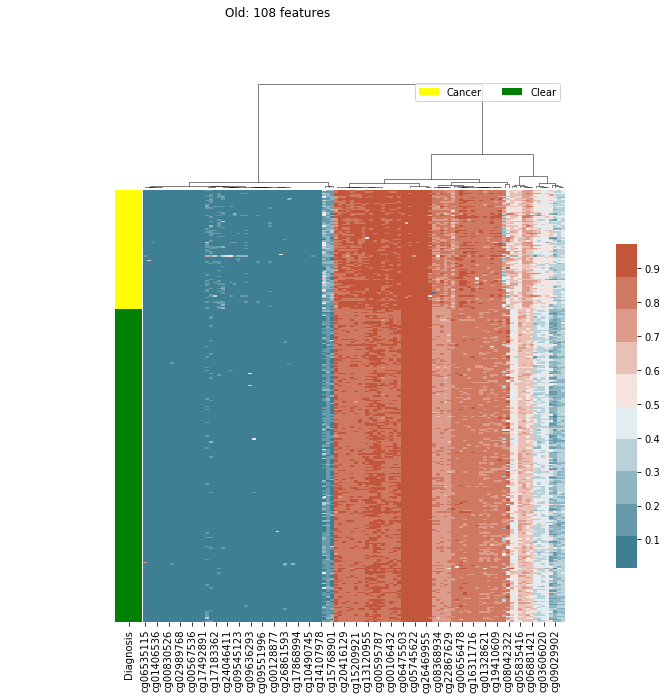

In [32]:
vmin = 0
vmax = 1
numCors = 10
interval = round((vmax-vmin)/numCors, 3)
corBarTicks = np.arange(vmin, vmax+interval, interval)
cmap = sns.diverging_palette(220, 20, n=numCors) # "viridis"
g = sns.clustermap(feats, metric="euclidean", method="ward",
                   cmap=cmap, cbar_kws={"ticks":corBarTicks},
                   robust=True, linewidths=0, row_colors=row_colors, yticklabels=False,
                   row_cluster=False
                  )#, xticklabels=False, yticklabels=False)
g.fig.suptitle("{}: {} features".format(dataTag, numFeat))


# Draw the legend bar for the classes                 
for label, labelColor in zip(labels, labelColors):
    g.ax_col_dendrogram.bar(0, 0, color=labelColor, label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="upper right", ncol=5)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([.97, .2, .03, .45])
g.savefig("clustermap_{}_{}Features.png".format(dataTag, numFeat), dpi=1200)

In [33]:
reorderIdx = g.dendrogram_col.reordered_ind
featnames = feats.columns
reorderedFeatnames = [str(fID)+":"+featnames[idx] for fID, idx in zip(range(1,1+numFeat), reorderIdx)]
reorderedFeatnames_csv = [featnames[idx] for fID, idx in zip(range(1,1+numFeat), reorderIdx)]
scores = featsImpt.Importance_Score
reordedScores = [scores[idx] for idx in reorderIdx]
cancerColMean = CancerDF.to_numpy()
reordedCancerColMean = [cancerColMean[idx] for idx in reorderIdx]
clearColMean = ClearDF.to_numpy()
reordedClearColMean = [clearColMean[idx] for idx in reorderIdx]
diffFeatVals = np.abs(np.array(reordedCancerColMean) - np.array(reordedClearColMean))

dumpData = np.array([[s, d, ca, ce] for s, d, ca, ce in 
                     zip(reordedScores,diffFeatVals, reordedCancerColMean, reordedClearColMean)
                    ])
dumpDF = pd.DataFrame(
    data=dumpData,
    columns=["Importance Score", "Difference", "Cancer", "Clear"], 
    index=reorderedFeatnames_csv)
dumpDF.to_csv("Mean_Value_of_Each_HSIC_Lasso_Selected_Features_{}AgeGroup.csv".format(dataTag))

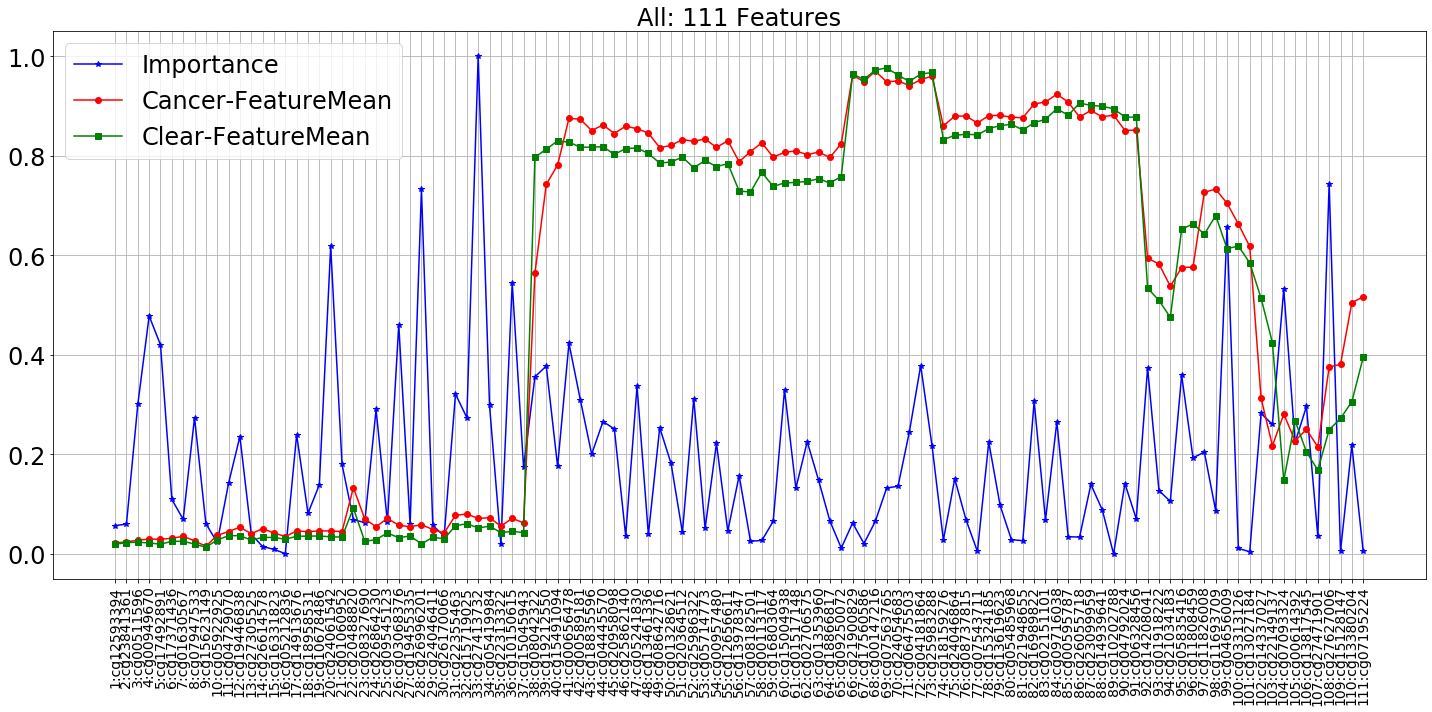

In [138]:
triPlot(reordedScores, reordedCancerColMean, reordedClearColMean, reorderedFeatnames, dataTag,
       ytickSize=24, xtickSize=14, titleSize=24, legendFontSize=24)

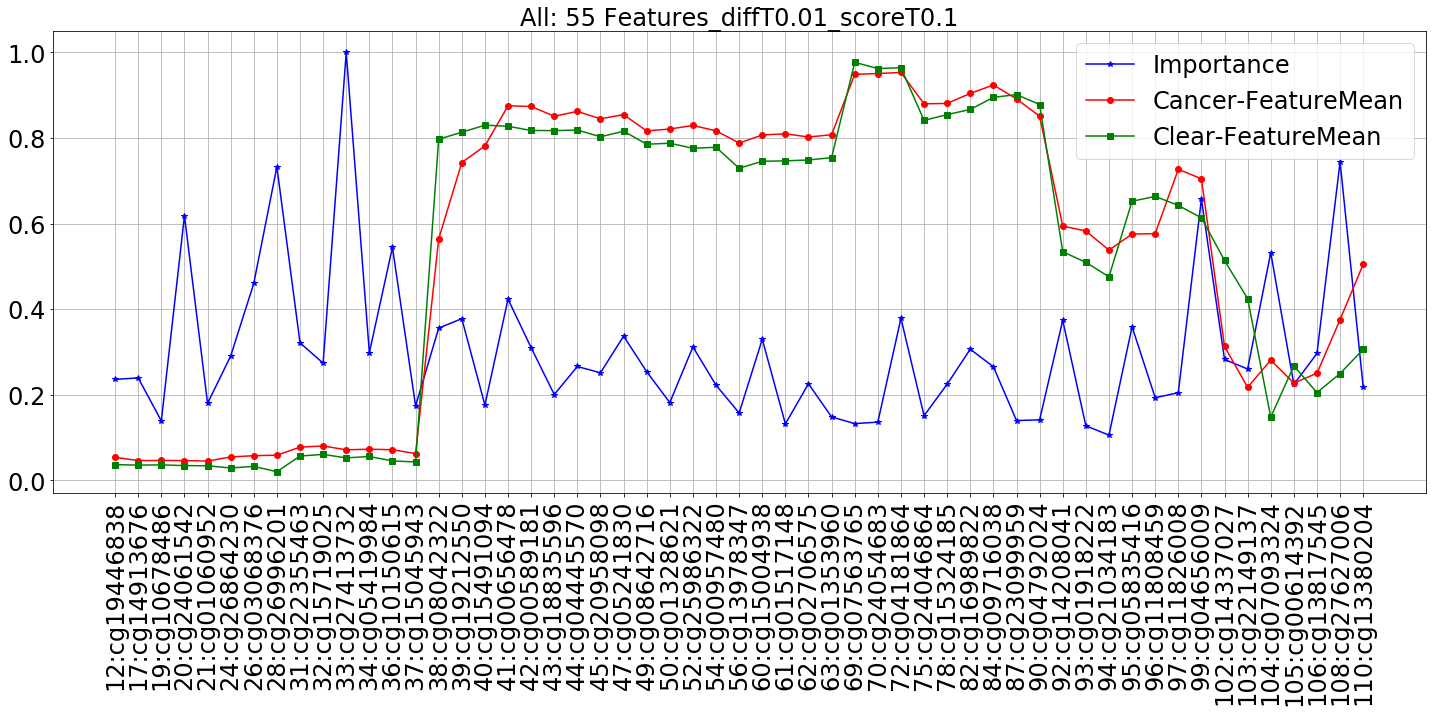

In [139]:
diffThreshold = 0.01
imptScoreThreshold = 0.1

selTriPlot(diffThreshold, imptScoreThreshold,
           reordedScores, reordedCancerColMean, reordedClearColMean, reorderedFeatnames,
           dataTag, ytickSize=24, xtickSize=24, titleSize=24, legendFontSize=24)

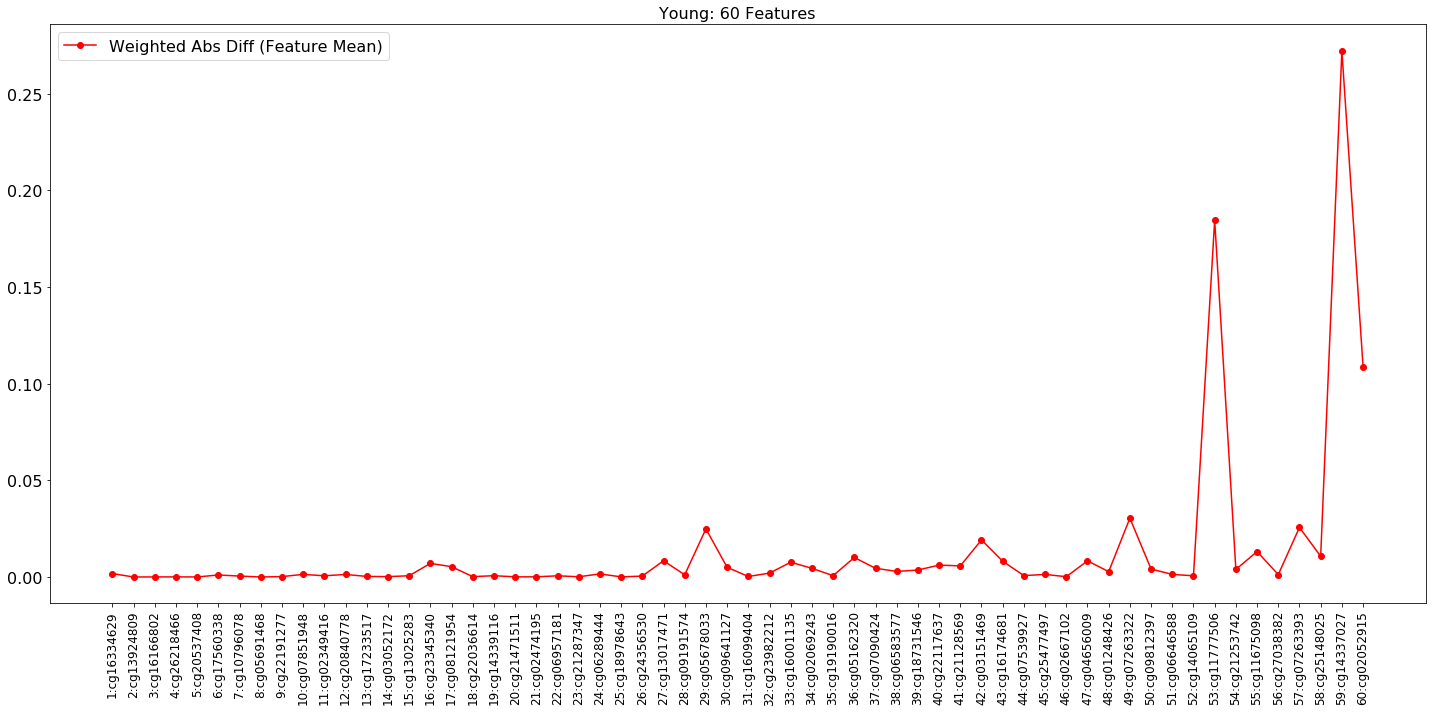

In [61]:
weightedDiffPlot(reordedScores, reordedCancerColMean, reordedClearColMean, reorderedFeatnames, dataTag, numFeat)